In [1]:
%matplotlib inline
%load_ext rpy2.ipython

In [2]:
%R require(ggplot2); require(GenometriCorr) ; require(rtracklayer);require( rtracklayer);\
require(IRanges)

/home/benjamin/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: ggplot2

  warnings.warn(x, RRuntimeWarning)
/home/benjamin/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: GenometriCorr

  warnings.warn(x, RRuntimeWarning)
/home/benjamin/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: IRanges

  warnings.warn(x, RRuntimeWarning)
/home/benjamin/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: BiocGenerics

  warnings.warn(x, RRuntimeWarning)
/home/benjamin/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: Loading required package: parallel

  warnings.warn(x, RRuntimeWarning)
/home/benjamin/anaconda3/lib/python3.5/site-packages/rpy2/rinterface/__init__.py:186: RRuntimeWarning: 
Attaching pack

array([1], dtype=int32)

In [37]:
import shutil, errno
from glob import glob as glb
import os

def copyanything(src, dest_dir):
    for filename in glb(os.path.join(src, '*.*')):
        shutil.copy(filename, dest_dir)

In [34]:
from IPython.display import HTML
def PDF(url):
    return HTML('<iframe src=./tmp_figures/%s width=700 height=350></iframe>' % url)

In [35]:
OUT_FOLDER_FIG = '/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_104E_v12/enrichment_analysis/figures'
TMP_FIG_PATH = '/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/downstream_analysis_2017/scripts/tmp_figures'

In [3]:
import pandas as pd 
# Make a pandas DataFrame
df = pd.DataFrame({'Alphabet': ['a', 'b', 'c', 'd','e', 'f', 'g', 'h','i'],
                   'A': [4, 3, 5, 2, 1, 7, 7, 5, 9],
                   'B': [0, 4, 3, 6, 7, 10,11, 9, 13],
                   'C': [1, 2, 3, 1, 2, 3, 1, 2, 3]})

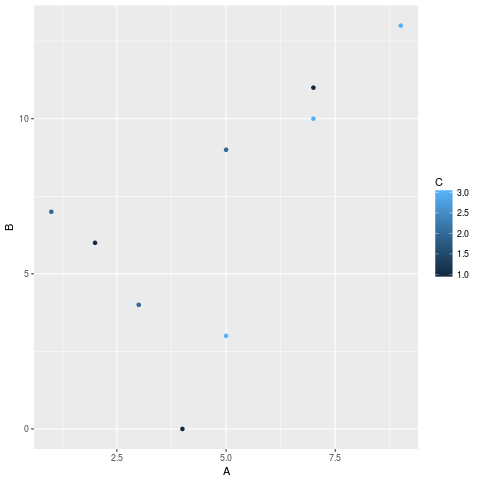

In [4]:
%%R -i df
ggplot(data=df) + geom_point(aes(x=A, y=B, color=C))

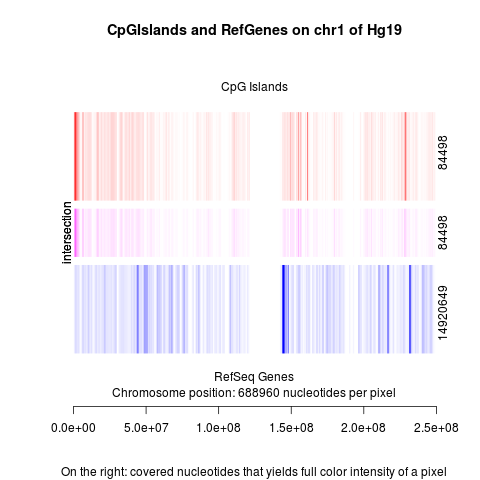

In [5]:
%%R 
library("rtracklayer")
library("TxDb.Hsapiens.UCSC.hg19.knownGene")
library("IRanges")
refseq <- transcripts(TxDb.Hsapiens.UCSC.hg19.knownGene)
cpgis <- import(system.file("extdata", "UCSCcpgis_hg19.bed", package = "GenometriCorr"))
seqinfo(cpgis) <- seqinfo(TxDb.Hsapiens.UCSC.hg19.knownGene)[seqnames(seqinfo(cpgis))]
cpgis
GenometriCorr:::VisualiseTwoIRanges(ranges(cpgis[seqnames(cpgis) == 'chr1']), ranges(refseq[seqnames(refseq) == "chr1"]), nameA = "CpG Islands", nameB = "RefSeq Genes", chrom_length = seqlengths(TxDb.Hsapiens.UCSC.hg19.knownGene)["chr1"],title = "CpGIslands and RefGenes on chr1 of Hg19")

In [6]:
%%R
cpgis <- import(system.file("extdata", "UCSCcpgis_hg19.bed", package = "GenometriCorr"))
seqinfo(cpgis) <- seqinfo(TxDb.Hsapiens.UCSC.hg19.knownGene)[seqnames(seqinfo(cpgis))]
cpgis

GRanges object with 28691 ranges and 0 metadata columns:
                       seqnames           ranges strand
                          <Rle>        <IRanges>  <Rle>
      [1]                  chr1 [ 28736,  29810]      *
      [2]                  chr1 [135125, 135563]      *
      [3]                  chr1 [327791, 328229]      *
      [4]                  chr1 [437152, 438164]      *
      [5]                  chr1 [449274, 450544]      *
      ...                   ...              ...    ...
  [28687]  chr9_gl000201_random [ 15651,  15909]      *
  [28688]  chr9_gl000201_random [ 26397,  26873]      *
  [28689] chr11_gl000202_random [ 16284,  16540]      *
  [28690] chr17_gl000204_random [ 54686,  57368]      *
  [28691] chr17_gl000205_random [117501, 117801]      *
  -------
  seqinfo: 69 sequences from hg19 genome


In [16]:
%%R
pn.area <- 100
pn.dist <- 100
pn.jacc <- 100
cpgi_to_genes <- GenometriCorr:::GenometriCorrelation(cpgis, refseq, chromosomes.to.proceed = c("chr1","chr2", "chr3"), ecdf.area.permut.number = pn.area,mean.distance.permut.number = pn.dist,jaccard.measure.permut.number = pn.jacc,keep.distributions = TRUE, showProgressBar = FALSE)
print(cpgi_to_genes)

The history saving thread hit an unexpected error (OperationalError('database is locked',)).History will not be written to the database.


                                               chr1         chr2        
query.population                               2462         1688        
reference.population                           7967         5092        
query.coverage                                 1881629      1379397     
reference.coverage                             116939971    109822784   
relative.distances.ks.p.value                  2.199463e-11 0           
relative.distances.ecdf.deviation.area         0.02188097   0.03430315  
relative.distances.ecdf.area.correlation       0.08747395   0.1370043   
query.reference.intersection                   1305420      889234      
query.reference.union                          117516180    110312947   
jaccard.measure                                0.01110843   0.008061012 
projection.test.p.value                        0            0           
projection.test.lower.tail                     FALSE        FALSE       
projection.test.obs.to.exp                     1.59

In [ ]:
%%R
GenometriCorr:::graphical.report(cpgi_to_genes, pdffile = "CpGi_to_RefSeq_chr1_picture.pdf", show.chromosomes = c("chr1"), show.all = FALSE)

In [22]:
%%R
setwd("/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_104E_v12/enrichment_analysis/lists")
getwd()
busco_bed <- import("Pst_104E_v12_p_busco.gene.bed", format ='bed')
effector_bed <- import("Pst_104E_v12_p_effector.gene.bed", format='bed')
no_effector_bed <- import("Pst_104E_v12_p_effectorp_noeffector.gene.bed", format='bed')
#Pst_104E_seqinfo <- import("../../../032017_assembly/Pst_104E_v12_p_ctg.genome_file", as = "Rle")
#Pst_104E_seqinfo
#effector_bed
pn.area <- 100
pn.dist <- 100
pn.jacc <- 100
effector_to_busco <- GenometriCorr:::GenometriCorrelation(effector_bed, busco_bed,  ecdf.area.permut.number = pn.area,mean.distance.permut.number = pn.dist,jaccard.measure.permut.number = pn.jacc,keep.distributions = TRUE, showProgressBar = FALSE)
effector_to_no_effector <- GenometriCorr:::GenometriCorrelation(effector_bed, no_effector_bed,  ecdf.area.permut.number = pn.area,mean.distance.permut.number = pn.dist,jaccard.measure.permut.number = pn.jacc,keep.distributions = TRUE, showProgressBar = FALSE)


In [23]:
%%R
GenometriCorr:::graphical.report(effector_to_busco, pdffile = "../figures/Pst_104E_p_effector_to_busco.pdf",  show.all = TRUE)
GenometriCorr:::graphical.report(effector_to_no_effector , pdffile = "../figures/Pst_104E_p_effector_to_no_effector.pdf",  show.all = TRUE)
GenometriCorr:::visualize(effector_to_busco, pdffile = "../figures/Pst_104E_p_effector_to_busco_vis.pdf",show.all = TRUE)
GenometriCorr:::visualize(effector_to_no_effector, pdffile = "../figures/Pst_104E_p_effector_to_no_effector_vis.pdf",show.all = TRUE)


png 
  2 


In [26]:
%%R
busco_bed_to_no_effector <- GenometriCorr:::GenometriCorrelation(busco_bed, no_effector_bed,  ecdf.area.permut.number = pn.area,mean.distance.permut.number = pn.dist,jaccard.measure.permut.number = pn.jacc,keep.distributions = TRUE, showProgressBar = FALSE)
GenometriCorr:::graphical.report(busco_bed_to_no_effector , pdffile = "../figures/Pst_104E_p_busco_to_no_effector.pdf",  show.all = TRUE)
GenometriCorr:::visualize(busco_bed_to_no_effector, pdffile = "../figures/Pst_104E_p_busco_to_no_effector_vis.pdf",show.all = TRUE)

png 
  2 


In [45]:
!ls

Pst_104E_p_busco_to_effector_pcontig_003.pdf
Pst_104E_v12_cluster_8.gene.bed
Pst_104E_v12_cluster_8.gene.gff3
Pst_104E_v12_cluster_8.list
Pst_104E_v12_h_all.gene.gff3
Pst_104E_v12_h_busco.gene.gff3
Pst_104E_v12_h_busco.list
Pst_104E_v12_h_ctg.REPET.gff
Pst_104E_v12_h_ctg.REPET.sorted.superfamily.gff
Pst_104E_v12_h_effector.gene.gff3
Pst_104E_v12_h_effector.list
Pst_104E_v12_h_effector.protein.fasta
Pst_104E_v12_h_noeffector.gene.gff3
Pst_104E_v12_h_noeffector.list
Pst_104E_v12_p_all.gene.bed
Pst_104E_v12_p_all.gene.gff3
Pst_104E_v12_p_busco.gene.bed
Pst_104E_v12_p_busco.gene.gff3
Pst_104E_v12_p_busco.list
Pst_104E_v12_p_ctg.REPET.gff
Pst_104E_v12_p_ctg.REPET.sorted.greater400.superfamily.gff
Pst_104E_v12_p_ctg.REPET.sorted.superfamily.gff
Pst_104E_v12_p_ctg.REPET.sorted.tmpsuperfamily.bed
Pst_104E_v12_p_ctg.REPET.sorted.tmpsuperfamily.gff
Pst_104E_v12_p_effector.gene.bed
Pst_104E_v12_p_effector.gene.gff3
Pst_104E_v12_p_effector.list
Pst_104E_v12_p_effectorp_noeffector.gene.bed
Pst_104E

In [50]:
%%R
#no_busco_bed <- import("Pst_104E_v12_p_non_busco.gene.bed", format ='bed')
#busco_bed_to_no_busco <- GenometriCorr:::GenometriCorrelation(no_busco_bed , no_effector_bed,  ecdf.area.permut.number = pn.area,mean.distance.permut.number = pn.dist,jaccard.measure.permut.number = pn.jacc,keep.distributions = TRUE, showProgressBar = FALSE)
GenometriCorr:::graphical.report(busco_bed_to_no_busco , pdffile = "../figures/Pst_104E_p_busco_to_no_busco.pdf",  show.all = TRUE)
GenometriCorr:::visualize(busco_bed_to_no_busco, pdffile = "../figures/Pst_104E_p_busco_to_no_busco_vis.pdf",show.all = TRUE)

png 
  2 


Doing comparison with TEs

In [ ]:
%%R
#now compare relations ship between TEs greater 400 and all sets of genes
setwd("/home/benjamin/genome_assembly/PST79/FALCON/p_assemblies/v9_1/Pst_104E_v12/enrichment_analysis/lists")
getwd()
busco_bed <- import("Pst_104E_v12_p_busco.gene.bed", format ='bed')
effector_bed <- import("Pst_104E_v12_p_effector.gene.bed", format='bed')
no_effector_bed <- import("Pst_104E_v12_p_effectorp_noeffector.gene.bed", format='bed')
TE_greater_400_bed <- import("Pst_104E_v12_p_ctg.REPET.sorted.greater400.superfamily.gff")
TE_g400_to_busco <- GenometriCorr:::GenometriCorrelation(TE_greater_400_bed, busco_bed,  ecdf.area.permut.number = pn.area,mean.distance.permut.number = pn.dist,jaccard.measure.permut.number = pn.jacc,keep.distributions = TRUE, showProgressBar = FALSE)
TE_g400_to_effector <- GenometriCorr:::GenometriCorrelation(TE_greater_400_bed, effector_bed,  ecdf.area.permut.number = pn.area,mean.distance.permut.number = pn.dist,jaccard.measure.permut.number = pn.jacc,keep.distributions = TRUE, showProgressBar = FALSE)
TE_g400_to_no_effector <- GenometriCorr:::GenometriCorrelation(TE_greater_400_bed, no_effector_bed,  ecdf.area.permut.number = pn.area,mean.distance.permut.number = pn.dist,jaccard.measure.permut.number = pn.jacc,keep.distributions = TRUE, showProgressBar = FALSE)

In [ ]:
%%R

GenometriCorr:::graphical.report(TE_g400_to_busco  , pdffile = "../figures/Pst_104E_p_TE_g400_to_busco.pdf",  show.all = TRUE)
GenometriCorr:::visualize(TE_g400_to_busco , pdffile = "../figures/Pst_104E_p_busco_TE_g400_to_busco_vis.pdf",show.all = TRUE)

GenometriCorr:::graphical.report(TE_g400_to_effector  , pdffile = "../figures/Pst_104E_p_TE_g400_to_effector.pdf",  show.all = TRUE)
GenometriCorr:::visualize(TE_g400_to_effector , pdffile = "../figures/Pst_104E_p_busco_TE_g400_to_effector_vis.pdf",show.all = TRUE)

GenometriCorr:::graphical.report(TE_g400_to_no_effector  , pdffile = "../figures/Pst_104E_p_TE_g400_to_no_effector.pdf",  show.all = TRUE)
GenometriCorr:::visualize(TE_g400_to_no_effector , pdffile = "../figures/Pst_104E_p_busco_TE_g400_to_no_effector.pdf",show.all = TRUE)

In [51]:
#this moves the file to a folder were jupyter can access it for displaying.
copyanything(OUT_FOLDER_FIG, TMP_FIG_PATH)

In [52]:
PDF('Pst_104E_p_effector_to_no_effector.pdf')

In [40]:
PDF('Pst_104E_p_effector_to_busco_vis.pdf')

In [41]:
PDF("Pst_104E_p_TE_g400_to_busco.pdf")

In [42]:
PDF("Pst_104E_p_TE_g400_to_effector.pdf")

In [43]:
PDF("Pst_104E_p_TE_g400_to_no_effector.pdf")

In [49]:
PDF('Pst_104E_p_busco_to_no_busco.pdf')

In [44]:
#not working as this also includes buscos. Needs to be none BUSCOS
PDF('Pst_104E_p_busco_to_no_effector.pdf')